# Load images from new Echelle

## Imports and Setup

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import os

In [2]:
# Don't know how to import locally, so I just use %run
%run ../tools/echelle.py

In [3]:
files_fujii = {
    "orders": "pattern_fujii.txt",
    "wavelength": "",
    "sphr": "LED.tif",
    "bkgr": "LED_bkg.tif",
    "integral": "integrating_sphere.txt",
}

In [4]:
%run ../tools/echelle.py
folder = './data'
#crop = [1400,2600]
#files_fujii['orders'] = "pattern_fujii.txt"
crop = [1300,2950]
files_fujii['orders'] = "pattern_fujii-1.txt"
cb = Calibrations(folder,files_fujii,spec='fujii',dv=17,crop=crop)
cb.start_cut()

In [5]:
bpth = folder
fname = 'Sep28_2022_175416_100ms_sekibunki.tif'
sphr = EchelleImage(os.path.join(bpth,fname),clbr=cb,spec='fujii',crop=crop)
fname = 'Sep28_2022_175455_100ms_sekibunki-dark.tif'
sphrbg = EchelleImage(os.path.join(bpth,fname),clbr=cb,spec='fujii',crop=crop)
sphr.calculate_order_spectra()
sphrbg.calculate_order_spectra()

In [6]:
h2 = EchelleImage('./data/H2-lamp-Fulcher-1s--20C.tif',clbr=cb,spec='fujii',crop=crop)
h2.calculate_order_spectra()

In [7]:
subtract = [i.min() for i in h2.order_spectra[0]]

In [25]:
%matplotlib widget

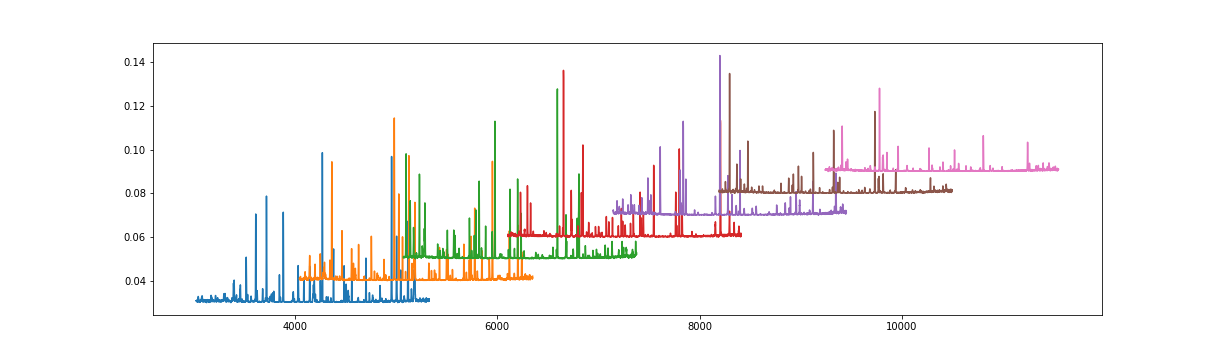

In [58]:
fig,axs = plt.subplots()
fig.set_size_inches([17,5])
x = np.arange(cb.DIMW)

# range(3,10) 
_ = [plt.plot(x+1000*i + 3*i**2,(h2.order_spectra[0,i]-subtract[i])/sphr.order_spectra[0,i]+1e-2*i) for i in range(3,10)]